Waar gaan we op focussen:

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [35]:
laadpaaldata = pd.read_csv('laadpaaldata.csv')
laadpaaldata.sort_values(by='Started')
laadpaaldata.head()


,Started,Ended,TotalEnergy,ConnectedTime,ChargeTime,MaxPower
0,2018-01-01 08:45:26,2018-01-01 09:16:45,1830,0.5219,0.5219,3524
1,2018-01-01 11:26:40,2018-01-01 14:36:13,28641,3.1592,2.3056,13680
2,2018-01-01 12:39:28,2018-01-01 20:58:10,65534,8.3117,8.3117,11200
3,2018-01-01 14:26:58,2018-01-02 06:36:55,10080,16.1658,4.3006,3360
4,2018-01-01 14:50:05,2018-01-01 17:21:50,7180,2.5292,2.0656,3758


In [24]:
#Uitrekening hoeveel tijd men daadwerkelijk niet aan het laden is
laadpaaldata["OverChargeTime"] = laadpaaldata["ConnectedTime"] - laadpaaldata["ChargeTime"]
#Bepalen wie wel en wie niet aan het overladen was
laadpaaldata["OverCharged"] = laadpaaldata["OverChargeTime"] > 0

laadpaaldata.loc[laadpaaldata['OverChargeTime'] == 0,'OverChargeTime'] = np.nan

In [4]:
#Zoeken naar twee speciafieke datums met 29 dagen in februari (schikkeljaar), deze zijn niet interperteerbaar.
laadpaaldata.loc[laadpaaldata['Started'] == "2018-02-29 07:37:53"]

,Started,Ended,TotalEnergy,ConnectedTime,ChargeTime,MaxPower,OverChargeTime,OverCharged
1732,2018-02-29 07:37:53,2018-02-29 16:46:45,11907,9.1478,3.7336,3360,5.4142,True


In [36]:
#Zoeken naar twee speciafieke datums met 29 dagen in februari (schikkeljaar), deze zijn niet interperteerbaar.
laadpaaldata.loc[laadpaaldata['ChargeTime'] < 0]

,Started,Ended,TotalEnergy,ConnectedTime,ChargeTime,MaxPower
941,2018-01-31 19:48:14,2018-02-01 06:30:30,10930,10.7044,-738.796,3240
942,2018-01-31 20:14:09,2018-02-01 11:15:45,9152,15.0267,-739.989,3230
1724,2018-02-28 17:28:20,2018-03-01 14:02:02,18876,20.5617,-665.250,3256
3480,2018-04-30 22:55:49,2018-05-01 07:41:45,9740,8.7656,-716.180,3360
4270,2018-05-31 19:43:03,2018-06-01 06:59:43,36570,11.2778,-738.968,7769
4271,2018-05-31 20:14:40,2018-06-01 07:11:07,35750,10.9408,-739.745,8710
5079,2018-06-30 21:50:30,2018-07-01 09:43:00,55540,11.8750,-714.516,10635
5792,2018-07-31 18:50:37,2018-08-01 07:43:16,60860,12.8775,-738.018,10664
5795,2018-07-31 21:09:01,2018-08-01 06:41:10,12182,9.5358,-740.250,3319
8316,2018-10-31 18:32:04,2018-11-01 08:08:22,68440,13.6050,-736.645,11360


In [5]:
laadpaaldata.loc[laadpaaldata['Ended'] == "2018-02-29 07:46:07"]

,Started,Ended,TotalEnergy,ConnectedTime,ChargeTime,MaxPower,OverChargeTime,OverCharged
1731,2018-02-28 20:46:00,2018-02-29 07:46:07,10031,11.0019,4.0214,3234,6.9805,True


In [6]:
#Deze twee droppen
laadpaaldata = laadpaaldata.drop(1731)
laadpaaldata = laadpaaldata.drop(1732)

In [7]:
#De Started en Ended colommen zijn objecten en géén DateTime types.
laadpaaldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10186 entries, 0 to 10187
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Started         10186 non-null  object 
 1   Ended           10186 non-null  object 
 2   TotalEnergy     10186 non-null  int64  
 3   ConnectedTime   10186 non-null  float64
 4   ChargeTime      10186 non-null  float64
 5   MaxPower        10186 non-null  int64  
 6   OverChargeTime  10186 non-null  float64
 7   OverCharged     10186 non-null  bool   
dtypes: bool(1), float64(3), int64(2), object(2)
memory usage: 646.6+ KB


In [8]:
#Nu de data van de beide geen ongeldige combinaties van dag en maand heeft, kunnen we de colommen converteren naar een datetime64[ns] type
laadpaaldata['Started'] =  pd.to_datetime(laadpaaldata['Started'], format='%Y-%m-%d %H:%M:%S')
laadpaaldata['Ended'] =  pd.to_datetime(laadpaaldata['Ended'], format='%Y-%m-%d %H:%M:%S')


laadpaaldata

,Started,Ended,TotalEnergy,ConnectedTime,ChargeTime,MaxPower,OverChargeTime,OverCharged
0,2018-01-01 08:45:26,2018-01-01 09:16:45,1830,0.52190,0.52190,3524,0.00000,False
1,2018-01-01 11:26:40,2018-01-01 14:36:13,28641,3.15920,2.30560,13680,0.85360,True
2,2018-01-01 12:39:28,2018-01-01 20:58:10,65534,8.31170,8.31170,11200,0.00000,False
3,2018-01-01 14:26:58,2018-01-02 06:36:55,10080,16.16580,4.30060,3360,11.86520,True
4,2018-01-01 14:50:05,2018-01-01 17:21:50,7180,2.52920,2.06560,3758,0.46360,True
...,...,...,...,...,...,...,...,...
10183,2018-12-31 16:25:27,2018-01-01 10:32:33,4300,18.11830,2.32583,3400,15.79247,True
10184,2018-12-31 16:54:19,2018-12-31 18:33:33,5880,1.65390,1.65390,3572,0.00000,False
10185,2018-12-31 18:29:44,2018-01-01 11:14:15,22020,16.74000,5.75000,4560,10.99000,True
10186,2018-12-31 18:35:38,2018-12-31 22:08:37,6939,3.54970,3.25890,3277,0.29080,True


In [11]:
#Hier voegen we drie colommen toe die de dag en maand afzonderlijk bijhouden. Deze kunnen we later makkelijk oproepen met onze seaborn visualisaties.
laadpaaldata['Month'] = laadpaaldata['Started'].dt.month
laadpaaldata['Day'] = laadpaaldata['Started'].dt.day

In [12]:
#We kunnen pas de weekday uitvinden op basis van de index van de dataframe, hiervoor maken we de index gelijk aan de colom "Started"
laadpaaldata = laadpaaldata.set_index("Started")
laadpaaldata['Weekday'] = laadpaaldata.index.weekday

In [25]:
laadpaaldata


,Ended,TotalEnergy,ConnectedTime,ChargeTime,MaxPower,OverChargeTime,OverCharged,Month,Day,Weekday
Started,,,,,,,,,,
2018-01-01 08:45:26,2018-01-01 09:16:45,1830,0.52190,0.52190,3524,NaN,False,1,1,0
2018-01-01 11:26:40,2018-01-01 14:36:13,28641,3.15920,2.30560,13680,0.85360,True,1,1,0
2018-01-01 12:39:28,2018-01-01 20:58:10,65534,8.31170,8.31170,11200,NaN,False,1,1,0
2018-01-01 14:26:58,2018-01-02 06:36:55,10080,16.16580,4.30060,3360,11.86520,True,1,1,0
2018-01-01 14:50:05,2018-01-01 17:21:50,7180,2.52920,2.06560,3758,0.46360,True,1,1,0
...,...,...,...,...,...,...,...,...,...,...
2018-12-31 16:25:27,2018-01-01 10:32:33,4300,18.11830,2.32583,3400,15.79247,True,12,31,0
2018-12-31 16:54:19,2018-12-31 18:33:33,5880,1.65390,1.65390,3572,NaN,False,12,31,0
2018-12-31 18:29:44,2018-01-01 11:14:15,22020,16.74000,5.75000,4560,10.99000,True,12,31,0


In [14]:
laadpaaldata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10186 entries, 2018-01-01 08:45:26 to 2018-12-31 19:34:55
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Ended           10186 non-null  datetime64[ns]
 1   TotalEnergy     10186 non-null  int64         
 2   ConnectedTime   10186 non-null  float64       
 3   ChargeTime      10186 non-null  float64       
 4   MaxPower        10186 non-null  int64         
 5   OverChargeTime  10186 non-null  float64       
 6   OverCharged     10186 non-null  bool          
 7   Month           10186 non-null  int64         
 8   Day             10186 non-null  int64         
 9   Weekday         10186 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(3), int64(5)
memory usage: 805.7 KB


In [26]:
laadpaaldata.describe()

,TotalEnergy,ConnectedTime,ChargeTime,MaxPower,OverChargeTime,Month,Day,Weekday
count,10186.000000,10186.000000,10186.000000,10186.000000,7014.000000,10186.000000,10186.000000,10186.000000
mean,9374.214608,6.357982,1.773551,4093.105046,6.657686,6.551640,15.689672,3.095720
std,10789.357139,8.419659,22.926281,2334.661121,29.106397,3.544753,8.763998,1.988965
min,1.000000,0.000600,-740.250000,0.000000,-0.010000,1.000000,1.000000,0.000000
25%,3930.250000,1.778150,1.370000,3276.000000,0.833150,3.000000,8.000000,1.000000
50%,7129.500000,3.801250,2.233600,3393.000000,3.223750,7.000000,16.000000,3.000000
75%,9898.000000,8.873025,3.482075,3570.000000,7.810875,10.000000,23.000000,5.000000
max,83160.000000,167.330000,52.500800,18750.000000,755.015700,12.000000,31.000000,6.000000


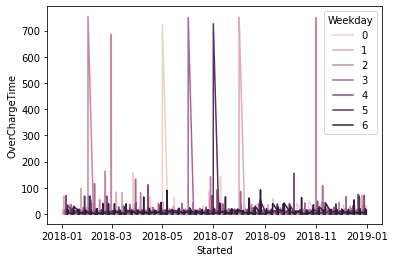

In [17]:
sns.lineplot(x="Started", y="OverChargeTime", hue = "Weekday",data=laadpaaldata)
# ax.plot(laadpaaldata, laadpaaldata["OverChargeTime"], laadpaaldata["Started"])
plt.show()



In [18]:
sns.catplot(x="day", y="total_bill", data=laadpaaldata)

ValueError: Could not interpret input 'day'

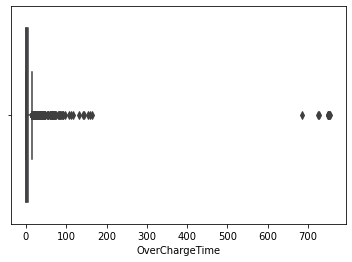

In [21]:
ax = sns.boxplot(x=laadpaaldata["OverChargeTime"])
plt.show()